In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import hvplot.pandas
import pygal
from pygal.style import Style
from IPython.display import SVG, display

In [2]:
#Read the CSV file
bnks_data = pd.read_csv('Resources/BNKS_holdings.csv')
bnks_data.dropna(inplace=True) 

# Extracting ticker symbols into a list
ticker_list = bnks_data['Ticker'].tolist()

In [3]:
selected_columns = ['Symbol','Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt','Issuance Of Debt',
                    'Issuance Of Capital Stock','Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
                    'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
                    'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities','Net Other Financing Charges', 
                    'Cash Dividends Paid','Net Preferred Stock Issuance', 'Preferred Stock Payments','Preferred Stock Issuance', 
                    'Net Common Stock Issuance','Common Stock Payments', 'Net Issuance Payments Of Debt','Net Short Term Debt Issuance', 
                    'Net Long Term Debt Issuance','Long Term Debt Payments', 'Long Term Debt Issuance','Investing Cash Flow', 
                    'Cash Flow From Continuing Investing Activities','Net Other Investing Changes', 'Net Investment Purchase And Sale',
                    'Sale Of Investment', 'Purchase Of Investment', 'Operating Cash Flow','Cash Flow From Continuing Operating Activities',
                    'Change In Working Capital', 'Change In Other Working Capital','Change In Other Current Assets','Change In Payables And Accrued Expense', 
                    'Other Non Cash Items', 'Deferred Tax','Deferred Income Tax','Depreciation Amortization Depletion','Depreciation And Amortization',
                    'Net Income From Continuing Operations']

simulated_columns = ['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt','Issuance Of Debt',
                    'Issuance Of Capital Stock','Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
                    'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
                    'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities','Net Other Financing Charges', 
                    'Cash Dividends Paid','Net Preferred Stock Issuance', 'Preferred Stock Payments','Preferred Stock Issuance', 
                    'Net Common Stock Issuance','Common Stock Payments', 'Net Issuance Payments Of Debt','Net Short Term Debt Issuance', 
                    'Net Long Term Debt Issuance','Long Term Debt Payments', 'Long Term Debt Issuance','Investing Cash Flow', 
                    'Cash Flow From Continuing Investing Activities','Net Other Investing Changes', 'Net Investment Purchase And Sale',
                    'Sale Of Investment', 'Purchase Of Investment', 'Operating Cash Flow','Cash Flow From Continuing Operating Activities',
                    'Change In Working Capital', 'Change In Other Working Capital','Change In Other Current Assets','Change In Payables And Accrued Expense', 
                    'Other Non Cash Items', 'Deferred Tax','Deferred Income Tax','Depreciation Amortization Depletion','Depreciation And Amortization',
                    'Net Income From Continuing Operations']

In [4]:
# Define a function to Fetch cash flow data from yfinance based on given list
def fetch_cash_flow(ticker_symbol):
    try:
        ticker = yf.Ticker(ticker_symbol)
        cash_flow = ticker.cashflow  # Fetching cash flow data
        return cash_flow
    except Exception as e:
        print(f"Error fetching data for {ticker_symbol}: {e}")
        return None

cash_flows = {}

for ticker in ticker_list:
    cash_flow_data = fetch_cash_flow(ticker)
    if cash_flow_data is not None:
        cash_flows[ticker] = cash_flow_data

In [5]:
# Get Cash flow data for 'BAC'
ticker_symbols = ['BAC']

# Accessing and printing the cash flow data for each specified ticker
for ticker_symbol in ticker_symbols:
    bac_cash_flow = cash_flows.get(ticker_symbol)
    bac = bac_cash_flow.transpose().reset_index()
    bac['index'] = pd.to_datetime(bac['index'])
    bac.set_index('index', inplace=True)
    bac.index.rename('date', inplace=True)
    bac['Symbol'] = ticker_symbol
    bac = bac[selected_columns]

# Cash flow data for 'JPM'
ticker_symbols = ['JPM']

# Accessing and printing the cash flow data for each specified ticker
for ticker_symbol in ticker_symbols:
    jpm_cash_flow = cash_flows.get(ticker_symbol)
    jpm = jpm_cash_flow.transpose().reset_index()
    jpm['index'] = pd.to_datetime(jpm['index'])
    jpm.set_index('index', inplace=True)
    jpm.index.rename('date', inplace=True)
    jpm['Symbol'] = ticker_symbol
    jpm = jpm[selected_columns]

# Get Cash flow data for 'WFC'
ticker_symbols = ['WFC']

# Accessing and printing the cash flow data for each specified ticker
for ticker_symbol in ticker_symbols:
    wfc_cash_flow = cash_flows.get(ticker_symbol)
    wfc = wfc_cash_flow.transpose().reset_index()
    wfc['index'] = pd.to_datetime(wfc['index'])
    wfc.set_index('index', inplace=True)
    wfc.index.rename('date', inplace=True)
    wfc['Symbol'] = ticker_symbol
    wfc = wfc[selected_columns]

In [6]:
# Combine yfinance cash flow data and create a reorganized dataframe
combined_cashflow = pd.concat([bac,jpm,wfc],axis=0).reset_index()
combined_cashflow.set_index(['Symbol','date'], inplace=True)

In [7]:
# Calculate the mean and standard deviation based on emperical distribution
mean_values = combined_cashflow.mean()
std_values = combined_cashflow.std()

# Set standardized dataframe
standard_cc = (combined_cashflow - mean_values) / std_values


In [8]:
#Simulate years 2019 and 2023 based on Emperical ditribution for visualization!

num_years = 5
num_data_points = len(simulated_columns)


simulated_data = np.random.normal(mean_values, std_values, size=(num_years, num_data_points))

date = pd.date_range(start='2019-01-01', end='2023-12-31', freq='Y')

simulated_bac = pd.DataFrame(simulated_data, index=date, columns=simulated_columns)
simulated_bac = simulated_bac.reset_index()
simulated_bac['index'] = pd.to_datetime(simulated_bac['index'])
sim_bac = simulated_bac.astype('object')
sim_bac.rename(columns={'index': 'date'}, inplace=True)
sim_bac.set_index('date', inplace=True)
sim_bac['Symbol'] = 'BAC'
sim_bac = sim_bac.drop(['2020-12-31','2021-12-31','2022-12-31'],axis=0)

simulated_jpm = pd.DataFrame(simulated_data, index=date, columns=simulated_columns)
simulated_jpm = simulated_jpm.reset_index()
simulated_jpm['index'] = pd.to_datetime(simulated_jpm['index'])
sim_jpm = simulated_jpm.astype('object')
sim_jpm.rename(columns={'index': 'date'}, inplace=True)
sim_jpm.set_index('date', inplace=True)
sim_jpm['Symbol'] = 'JPM'
sim_jpm = sim_jpm.drop(['2020-12-31','2021-12-31','2022-12-31'],axis=0)

simulated_wfc = pd.DataFrame(simulated_data, index=date, columns=simulated_columns)
simulated_wfc = simulated_wfc.reset_index()
simulated_wfc['index'] = pd.to_datetime(simulated_wfc['index'])
sim_wfc = simulated_wfc.astype('object')
sim_wfc.rename(columns={'index': 'date'}, inplace=True)
sim_wfc.set_index('date', inplace=True)
sim_wfc['Symbol'] = 'WFC'
sim_wfc = sim_wfc.drop(['2020-12-31','2021-12-31','2022-12-31'],axis=0)
sim_wfc

#combine simulated cashflow
simulated_cashflow = pd.concat([sim_bac,sim_jpm,sim_wfc],axis=0).reset_index()
simulated_cashflow.set_index(['Symbol','date'], inplace=True)
#simulated_cashflow = simulated_cashflow.applymap(lambda x: '%0.1f' %x)


# Calculate the mean and standard deviation based on emperical distribution
simulated_mean_values = simulated_cashflow.mean()
simulated_std_values = simulated_cashflow.std()

# Set standardized dataframe
standard_sc = (simulated_cashflow - simulated_mean_values) / simulated_std_values


In [15]:
# Merge Yfinance Api cash flow years 2020,2021 2022 and simulated years 2019 and 2023
banks_cashflow= pd.concat([standard_sc,standard_cc],axis=0)
banks_cashflow = banks_cashflow.reset_index().sort_values(by=['Symbol','date'])
banks_cashflow.set_index(['Symbol','date'], inplace=True)

In [16]:
display(banks_cashflow)

Free Cash Flow Repurchase Of Capital Stock  \
Symbol date                                                    
BAC    2019-12-31       0.912871                   -0.912871   
       2020-12-31        0.39518                    0.575198   
       2021-12-31      -0.430678                   -1.779969   
       2022-12-31       -0.41485                    0.868974   
       2023-12-31      -0.912871                    0.912871   
JPM    2019-12-31       0.912871                   -0.912871   
       2020-12-31      -1.759717                    0.593791   
       2021-12-31       1.127918                   -1.022101   
       2022-12-31       1.658587                    0.265431   
       2023-12-31      -0.912871                    0.912871   
WFC    2019-12-31       0.912871                   -0.912871   
       2020-12-31      -0.261727                    0.709071   
       2021-12-31      -0.509854                   -1.041438   
       2022-12-31        0.19514                    0.831043   
       2023-12-31      -0.912871                    0.912871   

                  Repayment Of Debt Issuance Of Debt  \
Symbol date                                            
BAC    2019-12-31         -0.912871         0.912871   
       2020-12-31          0.163861        -0.081421   
       2021-12-31          0.211262         0.670332   
       2022-12-31          0.750796         0.258745   
       2023-12-31          0.912871        -0.912871   
JPM    2019-12-31         -0.912871         0.912871   
       2020-12-31         -2.248726         0.747221   
       2021-12-31          -0.13119         0.889565   
       2022-12-31          0.264915         0.737891   
       2023-12-31          0.912871        -0.912871   
WFC    2019-12-31         -0.912871         0.912871   
       2020-12-31         -0.571191        -0.803161   
       2021-12-31           0.19825        -2.212498   
       2022-12-31          1.362022        -0.206675   
       2023-12-31          0.912871        -0.912871   

                  Issuance Of Capital Stock Interest Paid Supplemental Data  \
Symbol date                                                                   
BAC    2019-12-31                 -0.912871                       -0.912871   
       2020-12-31                 -0.440908                       -0.273628   
       2021-12-31                 -0.445733                        -0.90599   
       2022-12-31                  0.461772                        1.227243   
       2023-12-31                  0.912871                        0.912871   
JPM    2019-12-31                 -0.912871                       -0.912871   
       2020-12-31                  0.491526                        0.398143   
       2021-12-31                  1.637466                       -0.809219   
       2022-12-31                 -1.317854                        1.929749   
       2023-12-31                  0.912871                        0.912871   
WFC    2019-12-31                 -0.912871                       -0.912871   
       2020-12-31                 -0.064959                       -0.311363   
       2021-12-31                  0.996544                       -0.924553   
       2022-12-31                 -1.317854                       -0.330382   
       2023-12-31                  0.912871                        0.912871   

                  Income Tax Paid Supplemental Data End Cash Position  \
Symbol date                                                             
BAC    2019-12-31                          0.912871          0.912871   
       2020-12-31                          -0.42641         -0.016466   
       2021-12-31                          -0.45108         -0.184736   
       2022-12-31                         -0.537978         -0.800667   
       2023-12-31                         -0.912871         -0.912871   
JPM    2019-12-31                          0.912871          0.912871   
       2020-12-31                           0.53

In [17]:
# Analysis and visualization
net_change_in_cash = banks_cashflow['End Cash Position'] - banks_cashflow['Beginning Cash Position']
plot = net_change_in_cash.hvplot.line(x="date",title='Net Change in Cash from 2019 - 2023',by='Symbol',)
plot


:NdOverlay   [Symbol]
   :Curve   [date]   (0)

In [25]:
free_cash_flow = banks_cashflow['Free Cash Flow']
fcf_plot=free_cash_flow.hvplot.line(x="date",title='Free Cash Flow 2019 - 2023',by='Symbol',)
fcf_plot

:NdOverlay   [Symbol]
   :Curve   [date]   (Free Cash Flow)

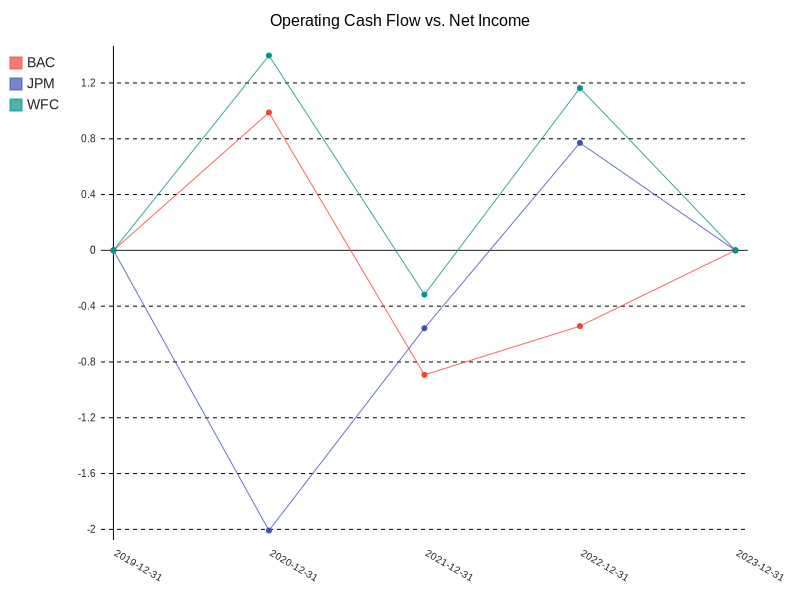

In [19]:
# Calculate the difference between Operating Cash Flow and Net Income by symbol
cash_flow_net_income = banks_cashflow['Operating Cash Flow'] - banks_cashflow['Net Income From Continuing Operations']

plot_style = Style(background='transparent', plot_background='transparent', font_family='Arial')

pygal_plot = pygal.Line(title='Operating Cash Flow vs. Net Income', x_label_rotation=30, style=plot_style)
dates = banks_cashflow.index.get_level_values('date').unique().strftime('%Y-%m-%d')
pygal_plot.x_labels = dates
symbol_groups = cash_flow_net_income.groupby(level='Symbol')

for symbol, group in symbol_groups:
    pygal_plot.add(symbol, group)
    
chart_svg = pygal_plot.render()

# Display the chart
display(SVG(chart_svg))


In [20]:
# My Analysis - Net change in cash: The line plot indicates a negative net change in cash over time. 
#This shows a decrease in cash and cash equivalents and tells me that these banks spent more than they received.
# Proper investigation is required but this expecditures could be a result of various factors like large investments,
#repayment of debt, or decrease in earnings or inflation.

In [21]:
# My Analysis - Operating Cash Flow vs. Net Income: